# Análisis de un conjunto de datos de origen biológico mediante técnicas de _machine learning_ supervisadas y no supervisadas 

## Librerías

In [1]:
# Librerías necesarias para manipular datos
import pandas as pd
from pathlib import Path

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import hvplot.pandas

# Librerías para crear el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

# Librerias para los métodos supervisados y no supervisados
from sklearn.manifold import Isomap # Para realizar Isomap
from sklearn.decomposition import PCA # Para realizar PCA
from sklearn.preprocessing import StandardScaler # Permite normalizar
from sklearn.impute import KNNImputer # Permite la imputación
import numpy as np
from sklearn.metrics import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Librerías para evaluación de modelos
from sklearn.metrics import roc_curve, auc, classification_report

## Importación de Datos

In [2]:
# Cargamos los nombres de las columnas

with open("./data/column_names.txt", "r") as file:
    nombres_columnas = file.read().splitlines()

# Leemos el archivo gene_expression

datos = pd.read_csv("./data/gene_expression.csv", delimiter=";", dtype=str, header=None)
datos.columns = nombres_columnas

#Convertimos las columnas de expresión génica a numéricas
columnas_expresion_genica = datos.columns[0:]  

for columna in columnas_expresion_genica:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

datos.dtypes



DUOXA1     float64
INTU       float64
UMOD       float64
STXBP4     float64
PARN       float64
            ...   
GASK1A     float64
TMEM114    float64
UCN        float64
RAB25      float64
TTC31      float64
Length: 500, dtype: object

In [3]:

# Leemos el archivo classes
archivo2 = pd.read_csv("./data/classes.csv", delimiter=";", dtype=str, header=None)
archivo2.columns = ["Sample", "Classes"]

# Se fusionan los dataframes
resultado = pd.concat([archivo2, datos], axis=1)

# Se guarda el resultado en un nuevo csv
resultado.to_csv("resultado_fusion.csv", index=False)

# Leemos el csv resultante en un dataframe
resultado_final_final = pd.read_csv("resultado_fusion.csv")

# Visualizamos las 10 primeras filas
resultado_final_final.head(10)

resultado_final_final.set_index("Sample", inplace=True)
resultado_final_final.head(10)

,Classes,DUOXA1,INTU,UMOD,STXBP4,PARN,TSC22D4,TTLL5,ZNF880,SPATA1,...,NPTN,BCAR3,PVALB,PTPN11,C19orf33,GASK1A,TMEM114,UCN,RAB25,TTC31
Sample,,,,,,,,,,,,,,,,,,,,,
sample_0,CHC,11.881389,10.282579,11.532989,9.818951,8.936338,8.479877,7.319582,9.052508,6.008866,...,3.017958,11.364512,9.507309,0.000000,6.190143,9.805113,10.876141,7.014690,0.0,9.713964
sample_1,CGC,10.405641,9.816923,10.691979,7.619750,8.349710,10.296480,9.360250,9.148949,7.210837,...,1.004394,10.854261,9.678533,1.174790,0.323658,4.828642,7.183635,5.030870,0.0,11.081909
sample_2,CHC,11.609170,9.701637,11.710367,8.883569,7.627724,8.245710,5.228084,10.658970,7.830509,...,0.452595,10.457073,8.876802,0.000000,0.796598,5.897010,8.324109,0.796598,0.0,10.195298
sample_3,CHC,11.922172,10.301290,9.662613,9.003394,6.772823,7.984322,5.218564,10.102816,8.319085,...,1.267356,11.354034,8.916787,0.000000,1.931418,7.624240,10.749836,6.469165,0.0,10.098190
sample_4,CFB,10.811174,10.275636,9.582229,10.373474,7.510693,9.654743,7.597956,9.184303,7.279471,...,2.612801,10.978038,8.692664,0.000000,6.254220,8.100505,10.041591,6.306973,0.0,10.549900
sample_5,CHC,11.425121,10.220294,10.700023,8.862876,8.672574,8.369619,7.499088,9.803579,7.169725,...,2.002018,10.803461,9.082162,0.515410,4.718789,7.951040,9.663948,8.570360,0.0,10.494246
sample_6,AGH,10.912800,11.039522,11.376212,9.243157,8.792026,11.873875,8.478867,9.485839,6.149656,...,7.035437,10.999556,9.055242,0.919683,6.131423,8.080700,10.050257,6.570924,0.0,10.360704
sample_7,CHC,11.646856,10.763221,11.035356,9.687759,8.931568,9.359045,8.437769,9.624989,6.812883,...,2.304861,10.992620,8.899454,1.481041,4.602237,7.293315,10.615207,6.110113,0.0,9.932206
sample_8,CFB,10.966109,11.099946,9.108621,9.621543,7.439739,9.739215,5.036147,10.474294,10.622143,...,3.559296,9.725138,9.482854,0.635336,7.428201,8.170611,9.975174,5.963724,0.0,10.584699


## Depurado de los datos

In [4]:
# Verificamos si hay valores nulos

total_nan = resultado_final_final.isna().sum().sum()
print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 0


In [5]:
# Se eliminan las columnas donde al menos hay un elemento NaN

data_clean = resultado_final_final.dropna(axis=1, how="any")

# Muestra el tamaño del DataFrame con los datos limpios

data_clean.shape

(801, 501)

In [6]:
# Verificar los tipos de datos

resultado_final_final.dtypes

Classes     object
DUOXA1     float64
INTU       float64
UMOD       float64
STXBP4     float64
            ...   
GASK1A     float64
TMEM114    float64
UCN        float64
RAB25      float64
TTC31      float64
Length: 501, dtype: object

In [7]:
# Eliminamos las columnas "Sample" y "Classes" por representar variables no numéricas

data_clean = resultado_final_final.drop(["Classes"], axis=1)

In [8]:
# Imputación de los datos

#Creamos y aplicamos el KNNImputer
imputador_knn = KNNImputer(n_neighbors=5)

# Realizar la imputación
datos_imputados = pd.DataFrame(imputador_knn.fit_transform(data_clean), columns=data_clean.columns)

# Guardar los datos imputados en un nuevo archivo CSV
datos_imputados.to_csv("datos_imputados.csv", index=False)

datos_imputados.head(10)


,DUOXA1,INTU,UMOD,STXBP4,PARN,TSC22D4,TTLL5,ZNF880,SPATA1,PLIN3,...,NPTN,BCAR3,PVALB,PTPN11,C19orf33,GASK1A,TMEM114,UCN,RAB25,TTC31
0,11.881389,10.282579,11.532989,9.818951,8.936338,8.479877,7.319582,9.052508,6.008866,0.591871,...,3.017958,11.364512,9.507309,0.000000,6.190143,9.805113,10.876141,7.014690,0.0,9.713964
1,10.405641,9.816923,10.691979,7.619750,8.349710,10.296480,9.360250,9.148949,7.210837,0.000000,...,1.004394,10.854261,9.678533,1.174790,0.323658,4.828642,7.183635,5.030870,0.0,11.081909
2,11.609170,9.701637,11.710367,8.883569,7.627724,8.245710,5.228084,10.658970,7.830509,0.000000,...,0.452595,10.457073,8.876802,0.000000,0.796598,5.897010,8.324109,0.796598,0.0,10.195298
3,11.922172,10.301290,9.662613,9.003394,6.772823,7.984322,5.218564,10.102816,8.319085,0.000000,...,1.267356,11.354034,8.916787,0.000000,1.931418,7.624240,10.749836,6.469165,0.0,10.098190
4,10.811174,10.275636,9.582229,10.373474,7.510693,9.654743,7.597956,9.184303,7.279471,1.275841,...,2.612801,10.978038,8.692664,0.000000,6.254220,8.100505,10.041591,6.306973,0.0,10.549900
5,11.425121,10.220294,10.700023,8.862876,8.672574,8.369619,7.499088,9.803579,7.169725,0.000000,...,2.002018,10.803461,9.082162,0.515410,4.718789,7.951040,9.663948,8.570360,0.0,10.494246
6,10.912800,11.039522,11.376212,9.243157,8.792026,11.873875,8.478867,9.485839,6.149656,2.042924,...,7.035437,10.999556,9.055242,0.919683,6.131423,8.080700,10.050257,6.570924,0.0,10.360704
7,11.646856,10.763221,11.035356,9.687759,8.931568,9.359045,8.437769,9.624989,6.812883,0.441802,...,2.304861,10.992620,8.899454,1.481041,4.602237,7.293315,10.615207,6.110113,0.0,9.932206
8,10.966109,11.099946,9.108621,9.621543,7.439739,9.739215,5.036147,10.474294,10.622143,0.000000,...,3.559296,9.725138,9.482854,0.635336,7.428201,8.170611,9.975174,5.963724,0.0,10.584699
9,10.892975,9.465795,10.820450,10.216249,7.430243,7.652221,7.001566,9.730042,8.662626,0.000000,...,3.244278,11.530314,9.016900,1.204141,4.793475,9.712211,10.765311,6.910673,0.0,10.379086


In [9]:
# Comprobamos de nuevo el número de N

total_nan = datos_imputados.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 0


In [10]:
# Estandarización de los datos
scaler = StandardScaler() # Crea una instancia de StandardScaler

# Estandariza los datos utilizando la instancia de StandarScaler
data_standardized = scaler.fit_transform(datos_imputados)

# Muestra los datos estandarizados
data_standardized[10]

array([-0.52719289,  0.03799673, -0.33097502,  1.31398697,  0.44274012,
       -0.42604884,  1.03068631, -0.59604533, -0.82784633, -0.61994276,
        0.65289205, -0.3919986 ,  0.02170225, -0.83338718, -0.62409474,
        0.75438102, -0.42839099,  0.71102472,  1.08905229, -0.53751245,
        1.03643823,  2.21639518,  0.93203763,  1.07351884,  0.89110733,
        0.19189257, -1.04938297,  0.90478798,  1.80418151,  1.22245693,
        0.66414045,  0.75065228,  1.18257137, -0.74754916,  1.97536768,
       -0.39841341,  0.37549789,  0.33610394, -0.1322398 , -0.62400906,
       -0.52321383, -1.00731881,  0.037195  ,  0.28124685, -0.18409133,
       -0.28065107, -0.97901542, -0.40147621, -0.44795008,  0.48668504,
       -0.42123054,  0.58397029,  0.45447873, -0.08424339,  0.77243538,
        0.16187482,  0.38908762, -1.12309539,  0.85598554, -0.09182985,
       -0.22185323,  1.23064635,  0.46615033,  0.22396357, -0.66837386,
        0.17766313, -0.66277707, -0.65446374, -0.01446589,  0.43

## Métodos no supervisados


### PCA

In [11]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(data_standardized)

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(data_standardized)

In [12]:
# Varianza explicada para 2 y 3 componentes
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza explicada acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [0.12386014 0.09433663]
Varianza acumulada PCA2: 0.2181967723800025
Varianza explicada PCA3: [0.12386014 0.09433663 0.08701378]
Varianza acumulada PCA3: 0.30521055342898146


### Isometric mapping (Isomap)

In [13]:
# Isomap para 2 componentes
isomap_2d = Isomap(n_components=2)
isomap_componentes_2d = isomap_2d.fit_transform(data_standardized)

# Isomap para 3 componentes
isomap_3d = Isomap(n_components=3)
isomap_componentes_3d = isomap_3d.fit_transform(data_standardized)

In [14]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_2d = isomap_2d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_2d = euclidean_distances(isomap_componentes_2d)

# Calcular el error de reconstrucción
error_reconstruccion_2d = np.mean((distancias_geodesicas_2d - distancias_reducidas_2d)**2)

print("Error de reconstrucción 2D:", error_reconstruccion_2d)

Error de reconstrucción 2D: 1463.435395580253


In [15]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_3d = isomap_3d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_3d = euclidean_distances(isomap_componentes_3d)

# Calcular el error de reconstrucción
error_reconstruccion_3d = np.mean((distancias_geodesicas_3d - distancias_reducidas_3d)**2)

print("Error de reconstrucción 3D:", error_reconstruccion_3d)

Error de reconstrucción 3D: 651.8745581782564


### K-means


In [16]:
# Representacion grafica sin agrupar
data_clustered = pd.DataFrame(data_standardized, columns=columnas_expresion_genica)

# Visualizando datos
data_clustered.hvplot.scatter(
    x=data_clustered.columns[0],
    y=data_clustered.columns[1],
    title="Datos sin clusters")



:Scatter   [DUOXA1]   (INTU)

In [17]:
# Creamos la instancia del modelo de K-means

kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(data_standardized)

data_clustered["cluster_3"] = kmeans_3.labels_
# Visualizando datos
data_clustered.hvplot.scatter(
    x=data_clustered.columns[0],
    y=data_clustered.columns[1],
    by='cluster_3',
    title="3 clusters")


:NdOverlay   [cluster_3]
   :Scatter   [DUOXA1]   (INTU)

Nuestra información tiene alta dimensionalidad, lo que puede estar afectando a la formación de grupos.
Aplicamos el metodo de agrupamiento al resultado de la PCA para dos dimensiones.

In [18]:
# Representacion grafica sin agrupar
pca2d_clustered = pd.DataFrame(components_2d, columns=["PC1", "PC2"])

# Visualizando datos
pca2d_clustered.hvplot.scatter(
    x=pca2d_clustered.columns[0],
    y=pca2d_clustered.columns[1],
    title="Componentes 2D sin clusters")


:Scatter   [PC1]   (PC2)

In [19]:
# Creamos nueva la instancia del modelo de K-means: para 3 grupos

kmeans_pc2d = KMeans(n_clusters=3, random_state=0)
kmeans_pc2d.fit(pca2d_clustered)

pca2d_clustered["cluster_3"] = kmeans_pc2d.labels_
# Visualizando datos
pca2d_clustered.hvplot.scatter(
    x=pca2d_clustered.columns[0],
    y=pca2d_clustered.columns[1],
    by='cluster_3',
    title="3 clusters")


:NdOverlay   [cluster_3]
   :Scatter   [PC1]   (PC2)

Se aprecian 3 grupos bien segregados, aunque probablemente la distinción entre los grupos 0 y 1  sea un artfacto producto de la propia tecnica de reducciṕon aplicada.

### Clustering Jerárquico Aglomerativo

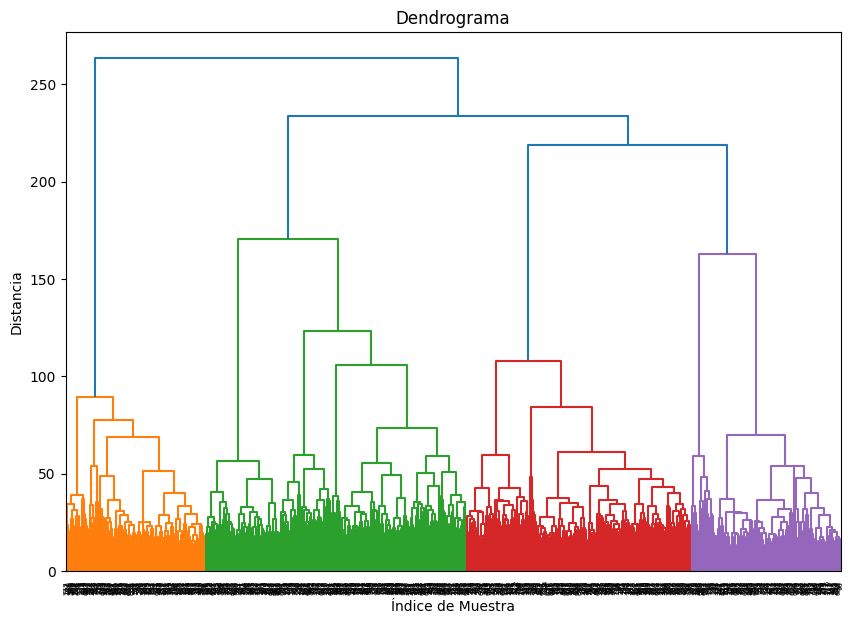

In [20]:
# Realizamos el clustering jerárquico
linked = linkage(data_standardized, 'ward')

# Visualización del dendograma

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

## Métodos de aprendizaje supervisado

In [21]:
# Separar la variable objetivo (target) de las características
X = resultado_final_final.drop("Classes", axis=1)
y = resultado_final_final["Classes"]

In [22]:
# Normalizar y estandarizar 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
# Codificar y:
y.value_counts()

Classes
CFB    300
AGH    146
CGC    141
CHC    136
HPB     78
Name: count, dtype: int64

In [24]:
categorias = y.unique().tolist()
y_coded = y.apply(lambda v: categorias.index(v))

y_coded.value_counts()


Classes
2    300
3    146
1    141
0    136
4     78
Name: count, dtype: int64

In [25]:
# Definimos la semilla aleatoria
random_seed = 0

In [26]:
# Crear subconjuntos de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coded, random_state=0)

In [27]:
# Inicializar los clasificadores
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

In [28]:
# Entrenar cada modelo y calcular métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir las métricas
    print(f"Modelo: {name}")
    print("Matriz de confusión:")
    print(conf_matrix)
    print(f"Precisión: {precision}")
    print(f"Sensibilidad: {recall}")
    print(f"Especificidad: {accuracy}") 
    print(f"Puntuación F1: {f1}")
    print("\n")

Modelo: Logistic Regression
Matriz de confusión:
[[32  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 85  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 17]]
Precisión: 1.0
Sensibilidad: 1.0
Especificidad: 1.0
Puntuación F1: 1.0


Modelo: Support Vector Machine
Matriz de confusión:
[[31  0  1  0  0]
 [ 0 33  0  0  0]
 [ 0  0 85  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 17]]
Precisión: 0.995082725905357
Sensibilidad: 0.9950248756218906
Especificidad: 0.9950248756218906
Puntuación F1: 0.9949999376550831


Modelo: Decision Tree
Matriz de confusión:
[[29  0  2  1  0]
 [ 1 24  1  0  7]
 [ 0  1 83  1  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 17]]
Precisión: 0.9393084320002056
Sensibilidad: 0.9303482587064676
Especificidad: 0.9303482587064676
Puntuación F1: 0.9297839850038611




No hemos aplicado el análisis de curva Roc dado que nuestra variable categórica no es binaria (si/no), sino que presentan varias categorías distintas.

## Cuestiones

### 1. Procesamiento de los datos:

**¿Qué método habéis escogido para llevar a cabo la imputación de los datos? Razonad vuestra respuesta?**

Para la imputacion de los datos hemos optado por el metodo KNN (k-Nearest Neighbors) es un método utilizado para llenar los valores faltantes en conjuntos de datos. Se basa en la idea de que los valores de una variable desconocida pueden ser estimados por los valores de las variables conocidas más cercanas en términos de similitud.
Al trabajar con valores de expresión génica los cuales poseen una extructura compleja y no lineal el metodo KNN nos permite capturar relaciones no lineales al no hacer suposiciones sobre la forma de los datos. Tambien, En el contexto de la expresión génica, las muestras vecinas pueden tener perfiles de expresión génica similares debido a similitudes biológicas. KNN puede aprovechar estas similitudes para imputar valores faltantes.

**¿Habéis llevado a cabo algún otro tipo de procesamiento? Razonad vuestra respuesta**

Para la realización de los analisis posteriores hemos tenido que convertir todos los valores de expresion de variable objeto a string, dado que la puntualización que los separaba producia que el progrma los leyera como variable objeto impidiendo así llevar a cabo los analisis.

### 2. Métodos supervisados

**¿Cuál es el motivo por el cual habéis seleccionado estas técnicas de reducción de dimensionalidad?** 
Ya que PCA es útil para eliminar la redundancia y capturar la estructura subyacente de los datos, lo que puede ayudar a simplificar los cálculos y reducir el ruido en los datos. Y por otra parte Isomap es de gran utilidad cuando los datos exhiben estructuras intrínsecas de baja dimensión que no se pueden capturar de manera efectiva con técnicas lineales como PCA


**¿Cuál es el motivo por el cual habéis seleccionado estas técnicas de clusterización?**
K-means se seleccionó por su eficiencia computacional, facilidad de interpretación e implementación, así como su flexibilidad para manejar diversos tamaños y formas de clústeres. Por otro lado, el clustering jerárquico aglomerativo fue elegido por su capacidad de proporcionar una estructura jerárquica que facilita la comprensión de relaciones entre grupos y subgrupos.

**En ambos casos, ¿qué aspectos positivos y negativo tienen cada una?**

**Análisis de Componentes Principales (PCA)**:
las ventajas que puede tener este tipo de análisis frente a otros similares pueden ser:
1.-Eficiencia Computacional: es computacionalmente eficiente y es capaz de manejar grandes conjuntos de datos.
2.-Fácil Implementación: PCA es relativamente fácil de entender e implementar.
3.-Preservación de Varianza: PCA se centra en preservar la varianza de los datos, lo que puede ser beneficioso en ciertos casos.
Por otro lado, las desventajas que acompañan a este tipo de análisis pueden ser:
1.-Linealidad: la PCA asume linealidad en los datos, lo que puede ser una limitación si los datos tienen estructuras no lineales complejas.
2.-Sensibilidad a Outliers: la PCA puede ser sensible a los outliers, ya que busca maximizar la varianza y los outliers pueden influir significativamente en la varianza.
3.-Interpretación: las componentes principales pueden ser difíciles de interpretar y pueden carecer de significado en términos de las características originales.

**Mapeo Isométrico (Isomap)**:
Ventajas:
1.-Preservación de Distancias Geodésicas: Isomap preserva las distancias geodésicas (distancias a lo largo de las trayectorias más cortas en el espacio subyacente), lo que lo hace más adecuado para datos con estructuras no lineales.
2.-Manejo de Datos No Lineales: Isomap puede capturar estructuras no lineales complejas en los datos.
3.-Robustez ante Outliers: Isomap puede ser más robusto ante outliers que PCA, ya que se basa en relaciones de vecindario y no solo en la varianza.
Desventajas:
1.-Computacionalmente Costoso: Isomap puede ser computacionalmente costoso, especialmente para grandes conjuntos de datos, ya que implica el cálculo de distancias geodésicas.
2.-Parámetros Sensibles: Isomap puede ser sensible a la elección de parámetros, como el número de vecinos, y una elección inapropiada puede afectar los resultados.
3.-Interpretación: Al igual que PCA, las dimensiones resultantes pueden ser difíciles de interpretar directamente.

**K-Means**:
Ventajas:
1.-Escalabilidad: Funciona bien en conjuntos de datos grandes y con un número moderado de dimensiones.
2.-Convergencia Rápida: Converge rápidamente, especialmente en conjuntos de datos con estructuras esféricas.
3.-Fácil Implementación: Es fácil de entender e implementar.
Desventajas:
1.-Sesibilidad a Centroides Iniciales: La elección inicial de centroides puede afectar los resultados finales y, en algunos casos, puede conducir a soluciones subóptimas.
2.-Dependencia de la Forma de los Clusters: K-Means asume que los clusters son esféricos y de tamaño similar, lo que puede ser una limitación en datos con formas y tamaños de clusters irregulares.
3.-Número de Clusters Predefinido: Requiere especificar previamente el número de clusters, lo cual puede no ser conocido de antemano.

**Clustering Jerárquico Aglomerativo**:
Ventajas:
1.-No se Necesita Especificar el Número de Clusters: No es necesario especificar el número de clusters de antemano. El dendrograma proporciona una representación visual que puede ayudar a elegir el número óptimo de clusters.
2.-Interpretación Jerárquica: Proporciona una visión jerárquica de la estructura de clusters, lo que puede ser útil para la interpretación.
3.-Robustez ante Formas Irregulares: Puede manejar clusters con formas y tamaños irregulares, ya que no hace suposiciones sobre la forma de los clusters.
Desventajas:
1.-Complejidad Computacional: Puede ser computacionalmente costoso, especialmente en grandes conjuntos de datos, ya que la complejidad es cuadrática respecto al número de observaciones.
2.-Sensibilidad a la Métrica y al Método de Vinculación: Los resultados pueden variar según la métrica de distancia y el método de vinculación utilizados.
3.-Inflexibilidad una Vez que se Realiza el Clustering: Una vez que se realiza el clustering, no se puede deshacer la decisión de fusionar clusters.

**En el caso de la clusterización, ¿podéis afirmar con certeza que los clústeres generados son los mejores posibles? Razonad vuestra respuesta**
eNo se puede afirmar con certeza que los clústeres generados por un algoritmo de clusterización son los "mejores posibles". La evaluación de la calidad de los clústeres es un desafío, y la "mejor" solución puede depender de muchos factores, incluidos los objetivos específicos del análisis y la naturaleza de los datos. Diferentes algoritmos de clusterización pueden producir resultados diferentes para el mismo conju.

### 3. Métodos supervisados


**¿Cuál es el motivo por el cual habéis seleccionado ambas técnicas de aprendizaje supervisado? ¿Cuál ha dado mejores resultados a la hora de clasificar las muestras? Razonad vuestras respuestas**
Las SVM son eficaces para clasificar datos en espacios de alta dimensión y pueden manejar conjuntos de datos no lineales mediante el uso de funciones de kernel. 
Los árboles de decisión son intuitivos y fáciles de interpretar, lo que los hace ideales para la comprensión de la lógica de toma de decisiones. Además, pueden manejar datos categóricos y numéricos, así como detectar interacciones entre variables. 
Por otro lado, la regresión logística es útil para modelar la relación entre variables predictoras y una variable objetivo binaria, proporcionando probabilidades de pertenencia a una clase.

**¿Habéis considerado oportuno implementar algún método de reducción de dimensionalidad para procesar los datos antes de implementarlos en dichas técnicas?**

**¿Qué aspectos positivos y negativos tienen cada una de las técnicas que habéis elegido?**

**Regresión Logística**
Ventajas:
1.-Interpretabilidad: La regresión logística produce coeficientes que pueden interpretarse directamente en términos de probabilidad logarítmica de pertenecer a una clase.
2.-Eficiencia Computacional: Es computacionalmente eficiente y puede manejar grandes conjuntos de datos.
3.-Manejo de Clasificación Binaria: Es especialmente efectiva en problemas de clasificación binaria.
Desventajas:
1.-Limitada para Problemas No Lineales: Puede no funcionar bien en problemas altamente no lineales donde las fronteras de decisión son complejas.

**Máquinas de Soporte Vectorial (SVM)**:
Ventajas:
1.-Efectividad en Espacios de Alta Dimensión: SVM puede ser efectivo en espacios de alta dimensión, como en la clasificación de texto o imágenes.
2.-Manejo de Problemas No Lineales: Puede manejar eficientemente problemas no lineales utilizando kernels.
3.-Control sobre la Regularización: SVM proporciona un parámetro de regularización que permite controlar la complejidad del modelo.
Desventajas:
1.-Sensibilidad a la Elección del Kernel: Los resultados pueden depender de la elección adecuada del kernel y sus parámetros asociados.
2.-Requiere Ajuste de Hiperparámetros: Requiere ajuste cuidadoso de hiperparámetros para obtener un rendimiento óptimo.

**Árboles de Decisión**:
Ventajas:
1.-Interpretabilidad: Los árboles de decisión son fáciles de entender e interpretar, ya que se pueden visualizar gráficamente.
2.-Manejo de Datos Mixtos: Pueden manejar datos mixtos (categóricos y numéricos) sin necesidad de preprocesamiento extenso.
3.-No Requiere Escalado de Características: No requieren que las características se escalen antes de ajustar el modelo.
Desventajas:
1.-Inestabilidad: Los árboles pueden ser inestables y sensibles a pequeñas variaciones en los datos de entrenamiento.
2.-Tendencia al Sobreajuste: Tienen una tendencia al sobreajuste, especialmente en conjuntos de datos pequeños o ruidosos.
3.-Modelos No Lineales Limitados: Pueden no funcionar tan bien en problemas altamente no lineales en comparación con métodos más complejos como con kernels.



### 4. Deep learning
**De estas cuatro opciones, ¿qué tipo de arquitectura de deep learning sería la más adecuada para procesar datos de expresión génica? Razonad vuestra respuesta.**
a) Red de perceptrones (multiperceptron layers).
b) Redes convolucionales.
c) Redes recurrentes
d) Redes de grafos

La elección de la arquitectura de deep learning para procesar datos de expresión génica depende de la naturaleza de los datos y de los objetivos específicos del análisis. 

Cualquiera de las opciones podria ser valida depediendo de las circunstancias. Por ejemplo: redes recurrentes si se hace un análisis de diferencia temporal de expresión, redes de grafos en caso de análisis de expresion de generes relacionados (retroalimentación, activación dependiente... ), las redes de perceptrones si no hay una correlación secuencial o temporal...

